In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import numpy as np


In [18]:


data = pd.read_csv('traindata.csv')
data = data.drop(['id','price','date', 'price/sqft', 'rootprice/sqft'], axis=1)
X_train = data.drop(['log price'], axis=1)
y_train = data['log price']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [3]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.032610696101738744


In [4]:
model_params = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 110, 120],
    'learning_rate': [0.1],
    'max_depth': [7]
}

grid_search = GridSearchCV(estimator=model_params, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)



Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 120}
Best score:  0.9013975772098508


In [5]:
grid_search.cv_results_['mean_test_score']

array([0.90081628, 0.90129254, 0.90139758])

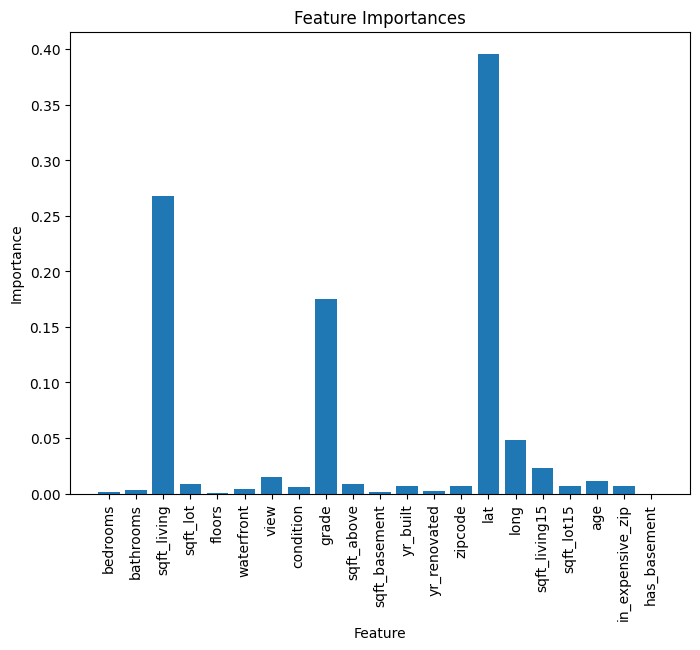

In [37]:
feature_importances  = grid_search.best_estimator_.feature_importances_
feature_names = list(X_train.columns)

feature_df = pd.DataFrame()
feature_df['importance'] = feature_importances
feature_df['feature'] = feature_names

plt.figure(figsize=(8, 6))
plt.bar(feature_df['feature'], feature_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [38]:
import pandas as pd

# create a dictionary of column names and values
data_zwillow = {'bedrooms': [3], 'bathrooms': [3], 'sqft_living': [1719], 'sqft_lot': [1719], 'floors': [1], 'waterfront': [0], 
        'view': [0], 'condition': [5], 'grade': [8], 'sqft_above': [1719], 'sqft_basement': [0], 'yr_built': [2023], 
        'yr_renovated': [2023], 'zipcode': [98007], 'lat': [47.623370], 'long': [-122.133130], 'sqft_living15': [1719], 
        'sqft_lot15': [1719], 'age': [0], 'in_expensive_zip': [0], 'has_basement': [0]}

# create a new DataFrame from the dictionary
zwillow_house = pd.DataFrame(data_zwillow)

# display the new DataFrame

zwillow_house


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,in_expensive_zip,has_basement
0,3,3,1719,1719,1,0,0,5,8,1719,...,2023,2023,98007,47.62337,-122.13313,1719,1719,0,0,0


In [39]:
log_price = grid_search.best_estimator_.predict(zwillow_house)
price = np.exp(log_price)
price[0]*2.03

1108950.1430712459

In [10]:
data = {'bedrooms': [4], 'bathrooms': [8], 'sqft_living': [1719], 'sqft_lot': [6920], 'floors': [3], 'waterfront': [1], 
        'view': [1], 'condition': [5], 'grade': [11], 'sqft_above': [6920], 'sqft_basement': [0], 'yr_built': [2023], 
        'yr_renovated': [2023], 'zipcode': [98007], 'lat': [47.623370], 'long': [-122.133130], 'sqft_living15': [1995], 
        'sqft_lot15': [6920], 'age': [28], 'in_expensive_zip': [1], 'has_basement': [0]}

# create a new DataFrame from the dictionary
zwillow_house = pd.DataFrame(data)

# display the new DataFrame

zwillow_house

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,in_expensive_zip,has_basement
0,4,8,1719,6920,3,1,1,5,11,6920,...,2023,2023,98007,47.62337,-122.13313,1995,6920,28,1,0


In [12]:
model = AdaBoostRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.0625335476057184
